In [1]:
import pandas as pd
import numpy as np
import pylab as pl

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

import itertools
import scipy.optimize as opt
! pip install seaborn
import seaborn as sns

In [2]:
filename = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
#All Independent Attributes (ID: 1-10), Dependent Variable, class (2 = benign; 4 = malignant)
headers = ["sample-code", "clump-thickness", "unifcell-size", "unifcell-shape", "marg-adhesion", "se-cellsize", "bare-nuclei", "bland-chromatin", "normal-nucleoli", "mitoses", "class"]

In [3]:
df = pd.read_csv(filename, names = headers)
print("Done")

Done


In [4]:
df.head()

,sample-code,clump-thickness,unifcell-size,unifcell-shape,marg-adhesion,se-cellsize,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.replace("?", np.nan, inplace = True)

In [6]:
missing_data = df.isnull()
missing_data.head(5)

,sample-code,clump-thickness,unifcell-size,unifcell-shape,marg-adhesion,se-cellsize,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

sample-code
False    699
Name: sample-code, dtype: int64

clump-thickness
False    699
Name: clump-thickness, dtype: int64

unifcell-size
False    699
Name: unifcell-size, dtype: int64

unifcell-shape
False    699
Name: unifcell-shape, dtype: int64

marg-adhesion
False    699
Name: marg-adhesion, dtype: int64

se-cellsize
False    699
Name: se-cellsize, dtype: int64

bare-nuclei
False    683
True      16
Name: bare-nuclei, dtype: int64

bland-chromatin
False    699
Name: bland-chromatin, dtype: int64

normal-nucleoli
False    699
Name: normal-nucleoli, dtype: int64

mitoses
False    699
Name: mitoses, dtype: int64

class
False    699
Name: class, dtype: int64



In [8]:
avg_barenuclei = df['bare-nuclei'].astype('float').mean(axis=0)
freq_barenuclei = df['bare-nuclei'].value_counts().idxmax()
print("Average Bare Nuclei: ", avg_barenuclei, ", Most Frequent Bare Nuclei: ", freq_barenuclei)

Average Bare Nuclei:  3.5446559297218156 , Most Frequent Bare Nuclei:  1


In [9]:
#replace the missing 'bare-nuclei' values by the most frequent 
df["bare-nuclei"].replace(np.nan, 1, inplace=True)

In [10]:
df["class"].replace([2,4],[0,1], inplace=True)

In [11]:
df[["bare-nuclei"]] = df[["bare-nuclei"]].astype("int")

In [12]:
df.dtypes

sample-code        int64
clump-thickness    int64
unifcell-size      int64
unifcell-shape     int64
marg-adhesion      int64
se-cellsize        int64
bare-nuclei        int64
bland-chromatin    int64
normal-nucleoli    int64
mitoses            int64
class              int64
dtype: object

Since the <i>Class</i> attribute is categorical with only two possible values, the most appropriate ML model is:
    <h3>Logistic Regression - Binary Classification</h3>

In [13]:
df.head()

,sample-code,clump-thickness,unifcell-size,unifcell-shape,marg-adhesion,se-cellsize,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [14]:
df.shape

(699, 11)

In [15]:
X = np.asarray(df[["unifcell-size", "unifcell-shape", "marg-adhesion", "bare-nuclei"]])
X[0:5]

array([[ 1,  1,  1,  1],
       [ 4,  4,  5, 10],
       [ 1,  1,  1,  2],
       [ 8,  8,  1,  4],
       [ 1,  1,  3,  1]])

In [16]:
y = np.asarray(df["class"])
y[0:5]

array([0, 0, 0, 0, 0])

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.69999505, -0.74329904, -0.63324716, -0.68697917],
       [ 0.28384518,  0.2668747 ,  0.76862067,  1.79966407],
       [-0.69999505, -0.74329904, -0.63324716, -0.41068547],
       [ 1.59563215,  1.61377302, -0.63324716,  0.14190191],
       [-0.69999505, -0.74329904,  0.06768675, -0.68697917]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (559, 4) (559,)
Test set:  (140, 4) (140,)


In [19]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1])

In [21]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.09674372, 0.90325628],
       [0.85366855, 0.14633145],
       [0.71427875, 0.28572125],
       [0.68773594, 0.31226406],
       [0.85366855, 0.14633145],
       [0.7627272 , 0.2372728 ],
       [0.81406921, 0.18593079],
       [0.19811441, 0.80188559],
       [0.05031371, 0.94968629],
       [0.0254724 , 0.9745276 ],
       [0.81406921, 0.18593079],
       [0.85366855, 0.14633145],
       [0.80469589, 0.19530411],
       [0.85366855, 0.14633145],
       [0.47416434, 0.52583566],
       [0.0632435 , 0.9367565 ],
       [0.71991626, 0.28008374],
       [0.85366855, 0.14633145],
       [0.77445444, 0.22554556],
       [0.85366855, 0.14633145],
       [0.85366855, 0.14633145],
       [0.12016098, 0.87983902],
       [0.85366855, 0.14633145],
       [0.85366855, 0.14633145],
       [0.83481855, 0.16518145],
       [0.59224509, 0.40775491],
       [0.85366855, 0.14633145],
       [0.8299952 , 0.1700048 ],
       [0.06940286, 0.93059714],
       [0.02753966, 0.97246034],
       [0.

<h3>Jaccard Index</h3>

In [22]:
jaccard_similarity_score(y_test, yhat)

0.95

<h3>Confusion Matrix</h3>

In [23]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
print(confusion_matrix(y_test, yhat, labels=[1,0]))    

[[46  6]
 [ 1 87]]


Confusion Matrix, without normalization
[[46  6]
 [ 1 87]]


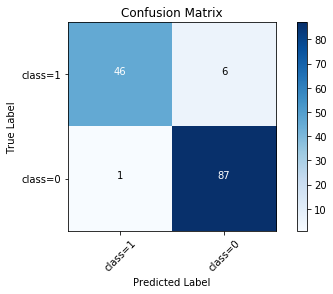

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1', 'class=0'], normalize= False, title='Confusion Matrix')

In [28]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.98      0.88      0.93        52

   micro avg       0.95      0.95      0.95       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.95      0.95      0.95       140



In [29]:
log_loss(y_test, yhat_prob)

0.2301971374403281